# Laboratorio 3: Métodos de Potencias
El presente laboratorio nos pide hallar el autovalor dominante que se obtiene a partir de obtener la matriz de las ecuaciones del movimiento e imprimir las iteraciones y su respectivo error, a su vez graficar como varía el error de cada iteración.

El conjunto de datos que vamos a usar son los siguientes:

$k_{1}=1,k_{2}=2,k_{3}=3,k_{4}=4$

$m_{1}=m_{2}=m_{3}=1$

Los valores de entradas que vamos a darle del inicio es la matriz de la cual vamos hallar su autovalor dominante, el número de iteraciones y el error en la cual la iteración se detiene en el caso que falten iterar demás. Para concluir, se mostrará la gráfica de como varía el error en cada iteración.

Hallando las ecuaciones de movimiento del sistema dado:

<p align="center">
  <img width="650" height="250" src="L3_Sistema.PNG">
</p>
El diagrama de cuerpo libre de la masa $m_{1}$ es:

<p align="center">
  <img width="300" height="200" src="L3_DCL1.PNG">
</p>
A partir de la Segunda Ley de Newton, en el eje horizontal considerando positivo si apuntan hacia la derecha y negativo si apuntan hacia la izquierda, obtenemos:

$$m_{1}\ddot{x_{1}}=k_{2}(x_{2}-x_{1})-k_{1}x_{1}$$
$$m_{1}\ddot{x_{1}}=-(k_{1}+k_{2})x_{1}+k_{2}x_{2}$$
El DCL para $m_{2}$ es:

<p align="center">
  <img width="300" height="200" src="L3_DCL2.PNG">
</p>
Usando la Segunda Ley de Newton, en el eje horizontal, obtenemos:

$$m_{2}\ddot{x_{2}}=k_{3}(x_{3}-x_{2})-k_{2}(x_{2}-x_{1})$$
$$m_{2}\ddot{x_{2}}=k_{2}x_{1}-(k_{2}+k_{2})x_{2}+k_{3}x_{3}$$
El DLC para $m_{3}$ es:

<p align="center">
  <img width="300" height="200" src="L3_DCL3.PNG">
</p>
Usando la Segunda Ley de Newton, en el eje horizontal, obtenemos:

$$m_{3}\ddot{x_{3}}=-k_{3}(x_{3}-x_{2})-k_{4}x_{3}$$
$$m_{3}\ddot{x_{3}}=k_{3}x_{2}-(k_{3}+k_{4})x_{3}$$

Reordenando las ecuaciones y dandole forma como matriz obetenemos la siguiente relación matricial:
$$\mathbb{M}\ddot{\vec{x}}+\mathbb{K}\vec{x}=0$$

con 
$
\vec{x}=
\left(
\begin{array}{c}
x_{1}(t) \\
x_{2}(t) \\
x_{3}(t) 
\end{array}
\right)
$, 
$
\ddot{\vec{x}}=
\left(
\begin{array}{c}
\ddot{x_{1}}(t) \\
\ddot{x_{2}}(t) \\
\ddot{x_{3}}(t) 
\end{array}
\right)
$,
$
\mathbb{K}=
\left(
\begin{array}{ccc}
(k_{1}+k_{2}) & -k_{2} & 0 \\
-k_{2} & (k_{2}+k_{3}) & -k_{3} \\
0 & -k_{3} & (k_{3}+k_{4})
\end{array}
\right)
$ y 
$
\mathbb{M}=
\left(
\begin{array}{ccc}
m_{1} & 0 & 0 \\
0 & m_{2} & 0 \\
0 & 0 & m_{3}
\end{array}
\right)
$.

Si $m_{1}=m_{2}=m_{3}=m$ entonces $\mathbb{M}=mI$, siendo $I$ la matriz identidad de orden 3x3. La ecuación del movimiento quedaría como:
$$mI\ddot{\vec{x}}+\mathbb{K}\vec{x}=0$$

Reemplazando los valores del conjunto de datos en $\mathbb{K}$, obtenemos:

$
\mathbb{K}=
\left(
\begin{array}{ccc}
3 & -2 & 0 \\
-2 & 5 & -3 \\
0 & -3 & 7
\end{array}
\right)
$

Sea  $\mathbb{B}=\frac{1}{m}\mathbb{K}$, reemplazando:

$
\mathbb{B}=\frac{1}{1}
\left(
\begin{array}{ccc}
3 & -2 & 0 \\
-2 & 5 & -3 \\
0 & -3 & 7
\end{array}
\right)
=
\left(
\begin{array}{ccc}
3 & -2 & 0 \\
-2 & 5 & -3 \\
0 & -3 & 7
\end{array}
\right)
$

A partir de la matriz $\mathbb{B}$ obtendremos sus auto valores resolviendo la siguiente ecuación:

$$det(\mathbb{B}-\lambda I)=0$$

El método que usaremos para obtener sus auto valores es el método de potencias pero con este método únicamente podremos obtener el auto valor dominante de dicha matriz.

### Implementación del algoritmo para resolver por el método de potencias y obtener su auto valor dominante

El primer paso es cargar las librerías que vamos a usar.

In [59]:
import numpy as np
import matplotlib.pyplot as plt

Segundo paso, definimos la función que resolvera por el método de potencias.

In [60]:
def power_method(matriz,vector_x,iteraciones,autovalor,error_autovalor,error_autovector,cota_de_error):
        n=iteraciones
        m=len(vector_x)
        autovalor_final=0
        vector_x1=np.zeros(m)
        vector_x2=np.zeros(m)
        vector_normalizado=np.zeros(m)
        for k in range(n):
                #Calculo del vector de iteración k
                vector_x1=np.dot(A,vector_x)
                
                #Pasando los valores positivos del vector_x1 al vector_x2
                vector_x2=[abs(x) for x in vector_x1]
                
                #Obtención del autovalor que es el elemento máximo del vector_x2
                autovalor=np.linalg.norm(max(vector_x2))
                
                #Normailización del vector x1
                vector_normalizado=np.array([i/autovalor for i in vector_x1])
                
                #Copiando los elementos del vector normalizado al vector_x
                vector_x=vector_normalizado.copy()
                
                #Calculo del vector de iteración k+1
                vector_x1=np.dot(A,vector_normalizado)
                #np.transpose(vector_x1.round(3))@np.transpose(vector_normalizado.round(3)))
                #Calculo del autovalor por el método de potencia de la iteración k
                numerador=np.dot(np.transpose(vector_x1.round(3)),vector_normalizado)
                denominador=np.dot(np.transpose(vector_normalizado.round(3)),vector_normalizado)
                autovalor_final=np.linalg.norm(numerador/denominador)
                #autovalor_final=numerador/denominador
                #Estimación de errores relativos de la iteración k
                error_relativo1=abs(autovalor_final-autovalor)/autovalor
                error_relativo2=np.linalg.norm(((np.transpose(vector_normalizado.round(3))-np.transpose(vector_x1.round(3)))/np.transpose(vector_x1.round(3))*1))
                error_autovalor[k]=error_relativo1
                error_autovector[k]=error_relativo2
                error_max=max(error_relativo1,error_relativo2)
                    
                #Abreviaremos el autovalor_final calculado usando el método de potencia a AV para la impresión en pantalla
                #Wi es el vector normalizado en cada iteración
                print("Para la iteración "+str(k+1)+": W"+str(k+1)+"="+str(np.transpose(vector_normalizado.round(m)))+"   AV="+str(autovalor_final)+"\tError:"+str(error_relativo1)+","+str(error_relativo2))
                if(error_max<cota_de_error):
                    vector_x2=[abs(x) for x in vector_x1]
                    autovalor=max(vector_x2)
                    vector_normalizado=vector_x1.copy()/autovalor
                    autovalor=autovalor_final
                    vector_x=vector_normalizado_x1.copy()
                    return [vector_normalizado, autovalor_final, k]
                
        vector_x2=[abs(x) for x in vector_x1]
        autovalor=max(vector_x2)
        vector_normalizado=vector_x1.copy()/autovalor
        autovalor=autovalor_final
        vector_x=vector_normalizado.copy()
        return [vector_normalizado, autovalor_final, k]

Tercer paso, vamos a ingresar nuestras matrices y vectores para al momento de ejecutarla se realicen las operaciones. La matriz $\mathbb{B}$ le asignaremos la letra A en el algoritmo.

In [61]:
k1=1
k2=2
k3=3
k4=4
m=1
A=np.array([[(k1+k2), -k2, 0],[-k2, (k2+k3), -k3],[0, -k3, (k2+k3)]], dtype=float)
vector_x=np.array([[1],[0],[0]])
autovalor=0
iteraciones=60
error_autovalor=np.zeros(iteraciones)
error_autovector=np.zeros(iteraciones)
cota_de_error=1.e-7

print("La matriz B es\n"+str(A)+"\ny el vector inicial elegido es X="+str(np.transpose(vector_x.round(3))))

La matriz B es
[[ 3. -2.  0.]
 [-2.  5. -3.]
 [ 0. -3.  5.]]
y el vector inicial elegido es X=[[1 0 0]]


Cuarto paso, implementar la función que usara el método de potencia para hallar el autovalor dominante.

In [62]:
[vector_x,autovalor,k]=power_method(A,vector_x,iteraciones,autovalor,error_autovalor,error_autovector,cota_de_error)
if(k==iteraciones):
    print("\nEl método diverge o no converge para la cotade error seleccionado.")
else:
    print("\nEl autovalor predominante de la matriz B es: "+str(autovalor))
    
    print("\nEl autovector que corresponde al autovalor es:")
    print(vector_x)
    
    print("\nEl número de iteraciones es: "+str(k+1))

Para la iteración 1: W1=[[ 1.    -0.667  0.   ]]   AV=5.460313797877251	Error:0.8201045992924169,1.5353145003405697
Para la iteración 2: W2=[[ 0.812 -1.     0.375]]   AV=7.322918836353537	Error:0.37304728181628827,1.50937123164877
Para la iteración 3: W3=[[ 0.573 -1.     0.629]]   AV=8.137060516035463	Error:0.049943292391672674,1.5125396562928797
Para la iteración 4: W4=[[ 0.463 -1.     0.765]]   AV=8.341508714982874	Error:0.03850108499786796,1.5183320949540153
Para la iteración 5: W5=[[ 0.412 -1.     0.83 ]]   AV=8.384595922432664	Error:0.019914208444422675,1.5221412008929465
Para la iteración 6: W6=[[ 0.389 -1.     0.86 ]]   AV=8.39238178864606	Error:0.009294725419099153,1.524075998034262
Para la iteración 7: W7=[[ 0.379 -1.     0.873]]   AV=8.394679959528673	Error:0.004321664929167285,1.5249690267260472
Para la iteración 8: W8=[[ 0.374 -1.     0.879]]   AV=8.395723022606266	Error:0.0021065442370957217,1.5254630432807676
Para la iteración 9: W9=[[ 0.372 -1.     0.882]]   AV=8.3943401

A partir de los datos obtenido, en la iteración número 51, los valores que arroja la máquina se mantiene constante y si aumentamos la iteraciones a más de 51 vamos a obtener los mismos resultados. En este presentación consideramos 300 iteraciones.

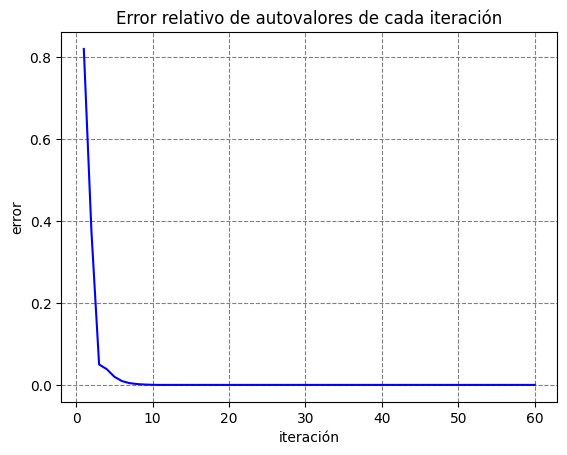

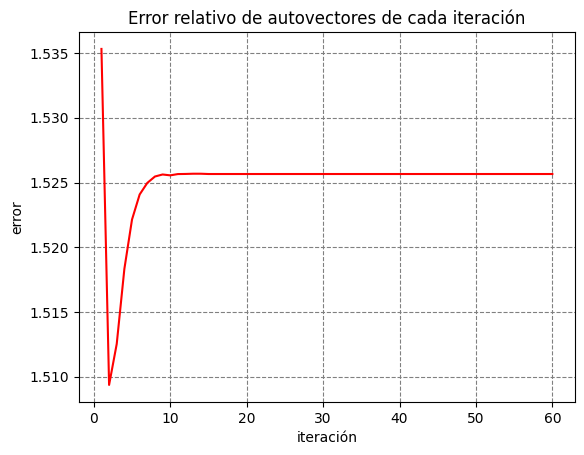

In [63]:
#Generando el intervalo del eje x que en este caso son la iteraciones
ejex=np.linspace(1,k+1,k+1)

#Generando el intervalo del eje y de cada iteración
error1=error_autovalor[0:k+1]
error2=error_autovector[0:k+1]

plt.plot(ejex,error1,'b-', label="Autovalor")
plt.xlabel('iteración')
plt.ylabel('error')
plt.title("Error relativo de autovalores de cada iteración")
plt.grid(axis="both",color="gray",linestyle="dashed")
plt.show()

plt.plot(ejex,error2,'r-', label="Autovector")
plt.xlabel('iteración')
plt.ylabel('error')
plt.title("Error relativo de autovectores de cada iteración")
plt.grid(axis="both",color="gray",linestyle="dashed")
plt.show()

Como se muestran en la gráficas, el error relativo de los autovalores es del orden de $10^{-5}$ practicamente tiende a cero pero aun así es un valor aproximado.
### Calculo de la frecuencia fundamental que esta relacionado al autovalor dominante
Los autovalores de la matriz $\mathbb{B}$ corresponde a las frecuencias angulares fundamentales del sistema, pero en este caso al usar el método de potencias hemos obtenido solamente el autovalor dominante. Así que solo obtendremos una frecuencia fundamental del sistema. La relación es la siguiente:
$$\mathbb{B}\vec{A}=\omega^{2}\vec{A}$$
$$\omega^{2}=\lambda$$
$$\omega=\sqrt{\lambda}$$
Reemplazando $\lambda=8.393443572972052{Hz}^{2}$
$$\omega=\sqrt{8.393443572972052{Hz}^{2}}$$
$$\omega=2.897144037\ Hz$$
Redondeando:
$$\omega=2.897 Hz$$
Entonces la ecuación del movimiento, obtenido es:
$$\vec{x}=\vec{A}\sin(2.897t)$$

con
$
\vec{x}=
\left(
\begin{array}{c}
x_{1}(t) \\
x_{2}(t) \\
x_{3}(t) 
\end{array}
\right)
$ y 
$
\vec{A}=
\left(
\begin{array}{c}
A_{1} \\
A_{2} \\
A_{3} 
\end{array}
\right)
$.

## Conclusiones

Hemos obtenido el autovalor dominante que es igual a $\lambda=8.393443572972052$ con error de $2.302x10^{-5}$ y también obtenimos su autovector correspondiente que es
$
\vec{W}=
\left(
\begin{array}{c}
0.37080732 \\
-1 \\
0.88400739
\end{array}
\right)
$ y su frecuencia fundamental es aproximadamente $\omega=2.897 Hz$.